Question 1: Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [9]:
# Import initial libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
# Removes the limit for the number of displayed columns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# read the data
df = pd.read_excel('/content/drive/MyDrive/Apoorv Clustering/Clustering+Clean+Ads_Data.xlsx', sheet_name='Data')

In [12]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [13]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25856,2020-10-17-3,Format5,720,300,216000,Inter225,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


In [14]:
df.shape

(25857, 19)

There are 25857 records and 19 columns

In [15]:
# different datatypes of the columns
df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [17]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25857.000000,25857.000000,25857.000000,2.585700e+04,2.585700e+04,2.585700e+04,25857.000000,25857.000000,25857.000000,25857.000000,19392.000000,19392.000000,18330.000000
mean,390.431218,332.182774,99683.276482,2.169621e+06,1.155322e+06,1.107525e+06,9525.881386,2414.473115,0.336729,1716.548955,0.069627,7.252900,0.351061
std,230.696051,194.260924,62640.685612,4.542680e+06,2.407244e+06,2.326648e+06,16721.686071,3932.835240,0.030540,2993.025498,0.074970,6.538314,0.343334
min,120.000000,70.000000,33600.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,9.133000e+03,5.451000e+03,2.558000e+03,305.000000,36.030000,0.350000,23.420000,0.002400,1.630000,0.090000
50%,300.000000,300.000000,75000.000000,3.309680e+05,1.894490e+05,1.621620e+05,3457.000000,1173.660000,0.350000,762.880000,0.007700,3.035000,0.160000
75%,720.000000,600.000000,84000.000000,2.208484e+06,1.008171e+06,9.496930e+05,10681.000000,2692.280000,0.350000,1749.982000,0.128300,12.220000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


Looks like there are a lot of null values in CTR, CPM and CPC columns.

Question 2: Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

Treating Null and Duplicate values

In [18]:
# Finding total of null values in the dataset
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

<b>CPM</b> stands for "cost per 1000 impressions".</br>
<b>CPC</b> stands for "Cost-per-click". Cost-per-click (CPC) bidding means that you pay for each click on your ads.</br>
<b>CTR:</b> stands for "Click through rate". CTR is the number of clicks that your ad receives divided by the number of times your ad is shown.</br></br>
The CTR, CPM and CPC columns are derived from the below formula:-</br></br>
CPM = (Spend / Impressions) x 1000</br>
CPC = (Spend / Clicks)</br>
CTR = (Clicks / Impressions) x 100

Define Functions to Correctly fill the values for CPM, CPC and CTR

In [19]:
def correct_CPM(x):
    return (df.Spend/df.Impressions)*1000

In [20]:
def correct_CPC(x):
    return (df.Spend/df.Clicks)

In [21]:
def correct_CTR(x):
    return (df.Clicks/df.Impressions)*100

This technique makes use of an user defined function with the required formula and broadcasts the output as per the formula using inbuilt lambda function.

In [22]:
df.CPM = df[['CPM']].apply(lambda x: correct_CPM(x))
df.CPC = df[['CPC']].apply(lambda x: correct_CPC(x))
df.CTR = df[['CTR']].apply(lambda x: correct_CTR(x))

In [23]:
df.sample(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
5870,2020-10-2-7,Format4,120,600,72000,Inter225,Video,Mobile,Display,20081,11278,4826,443,68.71,0.35,44.6600,9.179445,14.237464,0.155102
24549,2020-10-19-10,Format4,120,600,72000,Inter227,App,Mobile,Display,25555,15502,9757,1065,101.49,0.35,65.9685,10.915240,10.401763,0.095296
12972,2020-10-4-11,Format5,720,300,216000,Inter221,App,Mobile,Video,352190,200487,167495,19197,1738.94,0.35,1130.3100,11.461238,10.382041,0.090584
5480,2020-10-18-10,Format6,336,250,84000,Inter223,Web,Mobile,Display,3498,2467,2362,533,58.41,0.35,37.9700,22.565622,24.729043,0.109587
11252,2020-9-2-11,Format3,480,70,33600,Inter226,Web,Mobile,Video,900116,568132,543838,3063,1423.03,0.35,924.9700,0.563219,2.616643,0.464587
10227,2020-9-24-7,Format5,720,300,216000,Inter227,App,Mobile,Display,181168,112437,96459,12402,1208.99,0.35,785.8400,12.857276,12.533719,0.097483
13810,2020-10-22-19,Format5,720,300,216000,Inter226,Web,Mobile,Video,492860,246482,199614,22203,1929.32,0.35,1254.0600,11.122967,9.665254,0.086895
20906,2020-10-28-14,Format2,728,90,65520,Inter218,App,Mobile,Video,25100678,12654096,12221650,22380,21506.49,0.21,16990.1300,0.183118,1.759704,0.960969
20784,2020-9-8-9,Format2,728,90,65520,Inter228,Video,Mobile,Video,18389539,10322261,9971257,18942,19841.77,0.23,15278.1700,0.189966,1.989897,1.047501
261,2020-9-14-13,Format1,300,250,75000,Inter217,Web,Desktop,Video,1336,219,219,0,0.00,0.35,0.0000,0.000000,0.000000,NaN


In [24]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                       219
CPM                       219
CPC                      2586
dtype: int64

If we observe there are still some null values (NaN) remaining in the dataset. This is due to both the numerator and denominator as 0 for calculating CPM, CPC and CTR.</br>
We can just make them 0.0 instead of NaN.

In [25]:
df.fillna(value=0.0, inplace=True)

In [26]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

No Null values remaining now.

In [27]:
df.duplicated().sum()

0

No Duplicate records found.

In [28]:
# Taking out numeric column names in a list
num_col = df.select_dtypes(['int', 'float']).columns

Question 3: Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

Outlier Detection and Treatment

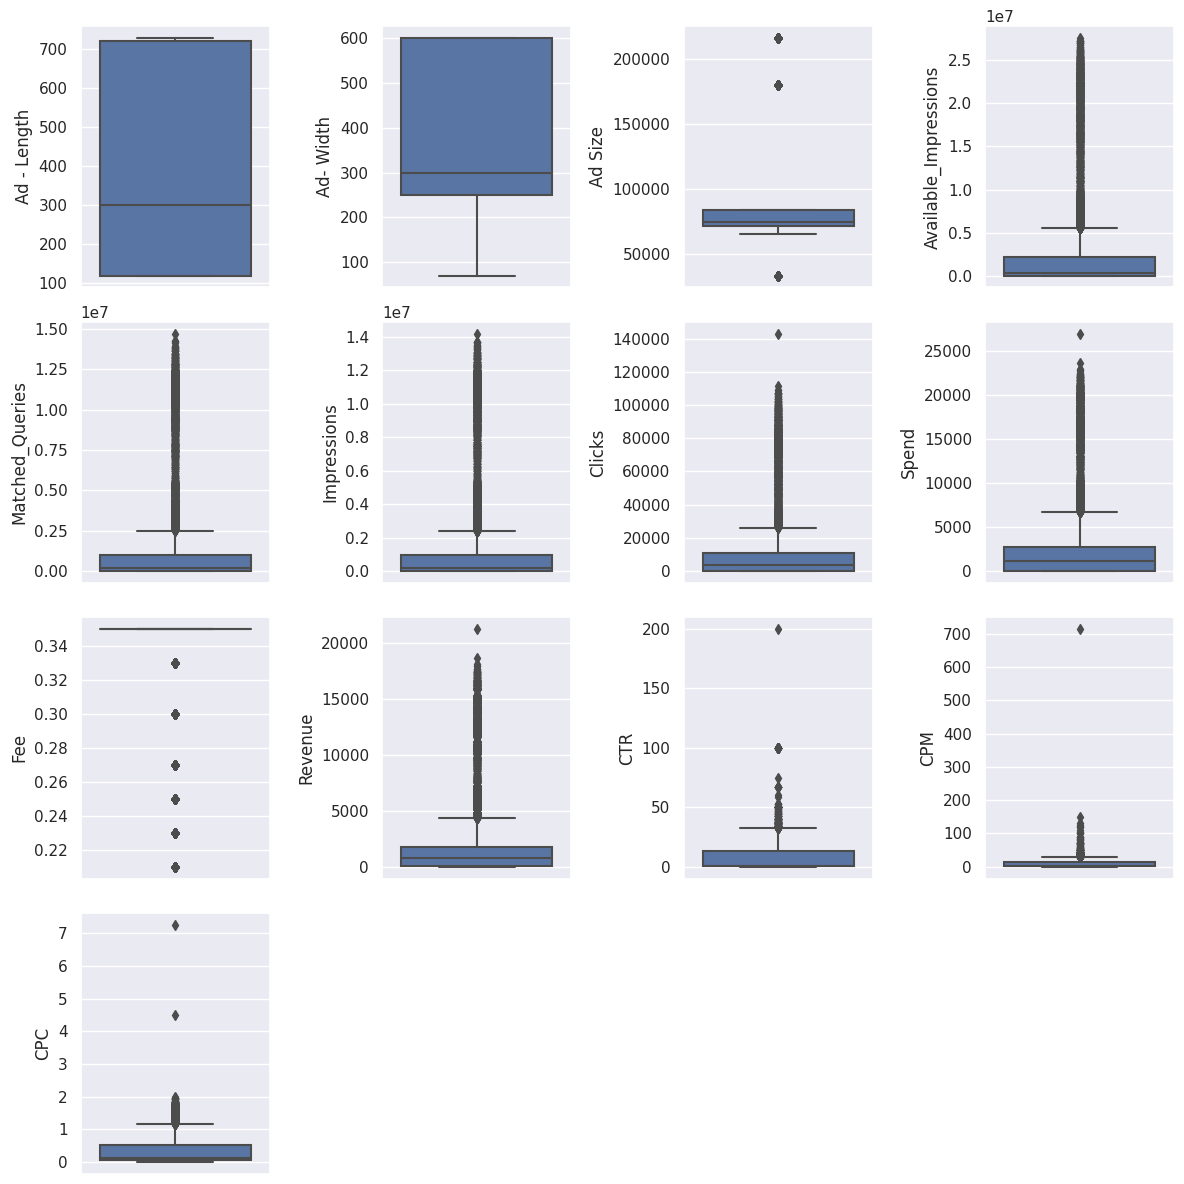

In [29]:
c = 1
plt.figure(figsize=(12,12))
for i in num_col:
    plt.subplot(4,4,c)
    sns.boxplot(data=df, y=i)
    c += 1

plt.tight_layout()

- Except Ad-Length and Ad-Width, all the numerical columns have outliers
- Outliers affects the clustering algorithm heavily
- We can treat the outliers by either deleting them or imputing them

Further, we choose to treat the outliers using the boxplot method.
We shall calculate the lower range and upper range using the IQR and then shall bring the data which is outside the ranges, closer to the median.


In [30]:
# Looping through the numerical columns except the first 2
# Finding Q1, Q3 and IQR
# Calculating LR = Q1-1.5IQR and UR = Q3 + 1.5IQR
# Replacing the values beyond LR and UR to LR and UR respectively.
for i in num_col[2:]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    LR = q1 - (1.5*iqr)
    UR = q3 + (1.5*iqr)
    df[i] = np.where(df[i] < LR, LR, df[i])
    df[i] = np.where(df[i] > UR, UR, df[i])

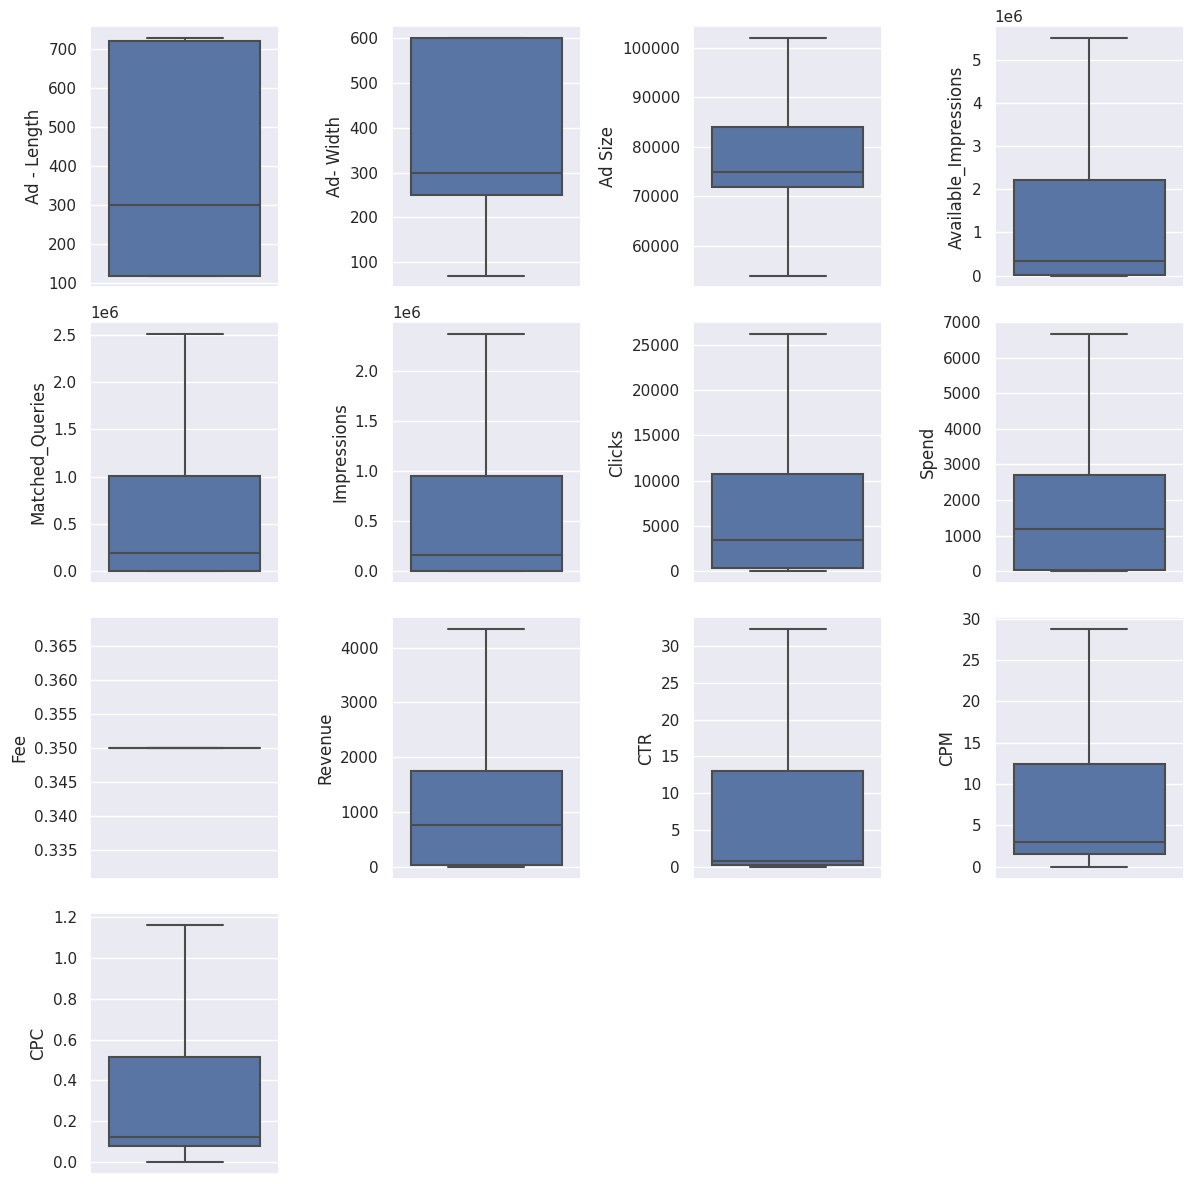

In [31]:
# Checking the boxlots again
c = 1
plt.figure(figsize=(12,12))
for i in num_col:
    plt.subplot(4,4,c)
    sns.boxplot(data=df, y=i)
    c += 1

plt.tight_layout()

<b>No outliers post treatment</b>

In [32]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.00,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.00,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,25857.0,7.748414e+04,1.535288e+04,54000.00,72000.000000,75000.000000,8.400000e+04,1.020000e+05
Available_Impressions,25857.0,1.357918e+06,1.896821e+06,0.00,9133.000000,330968.000000,2.208484e+06,5.507510e+06
Matched_Queries,25857.0,6.599593e+05,8.856514e+05,0.00,5451.000000,189449.000000,1.008171e+06,2.512251e+06
Impressions,25857.0,6.198646e+05,8.428723e+05,0.00,2558.000000,162162.000000,9.496930e+05,2.370396e+06
Clicks,25857.0,7.070830e+03,8.602090e+03,0.00,305.000000,3457.000000,1.068100e+04,2.624500e+04
Spend,25857.0,1.844354e+03,2.184307e+03,0.00,36.030000,1173.660000,2.692280e+03,6.676655e+03
Fee,25857.0,3.500000e-01,0.000000e+00,0.35,0.350000,0.350000,3.500000e-01,3.500000e-01
Revenue,25857.0,1.216792e+03,1.446340e+03,0.00,23.420000,762.880000,1.749982e+03,4.339825e+03


### Scaling the data

As the data is present in different units, this will not be adequate for the clustering algorithm. Data with different magnitudes, especially higher magnitude affects distance based algorithms. We need to bring the data on the same scale. We will be using the zscore scaling.

Question 4: Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [33]:
import scipy.stats as stats

In [34]:
df_num_scaled = df[num_col].apply(stats.zscore)

In [35]:
df_num_scaled.sample(10)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
13732,0.388262,-1.349668,-1.529654,0.578293,0.362181,0.338466,-0.090890,0.028690,NaN,0.015742,-0.811640,-0.757353,0.003885
20759,1.463290,-1.246712,-0.779291,2.187699,2.091486,2.076904,1.573621,2.212324,NaN,2.159308,-0.875013,-0.818897,2.023023
7282,1.428612,-0.165671,1.596856,-0.703006,-0.726855,-0.718167,-0.562180,-0.745983,NaN,-0.744710,0.983381,1.069556,-0.643966
22323,-1.172263,1.378674,-0.357213,-0.705488,-0.732790,-0.728358,-0.748999,-0.819412,NaN,-0.816796,0.392362,0.258117,-0.673121
17310,-0.392000,-0.423062,-0.161806,2.187699,2.091486,2.076904,0.124062,1.171940,NaN,1.198917,-0.867245,-0.873473,0.748383
11474,0.388262,-1.349668,-1.529654,0.460991,0.274790,0.268791,-0.456506,-0.174729,NaN,-0.183945,-0.851226,-0.812003,0.510751
19051,-1.172263,1.378674,-0.357213,-0.139154,0.040071,-0.032090,2.229056,2.212324,NaN,2.159308,0.673999,0.693589,-0.648244
18884,-1.172263,1.378674,-0.357213,-0.340364,-0.103091,-0.164768,2.229056,2.212324,NaN,2.159308,0.719278,0.954799,-0.613645
4584,-1.172263,1.378674,-0.357213,-0.702773,-0.730917,-0.731625,-0.791896,-0.828280,NaN,-0.825502,0.091049,0.519490,-0.519987
21185,-0.392000,-0.423062,-0.161806,0.632601,0.855507,0.897939,-0.461389,0.454275,NaN,0.433519,-0.869114,-0.764052,1.916206


Scaling has converted the values in the ‘Fee’ column into NaN. This is because, post the outlier treatment (explained earlier), every value in the ‘Fee’ column  had converted into value 0.35, as that was the most frequent value then and the remaining values were outliers. The IQR of this column was 0.
We can either choose to remove this column from calculation or convert all the NaNs into 0s.

In [36]:
# changing the Fee column into 0.0
df_num_scaled.fillna(value=0.0, inplace=True)

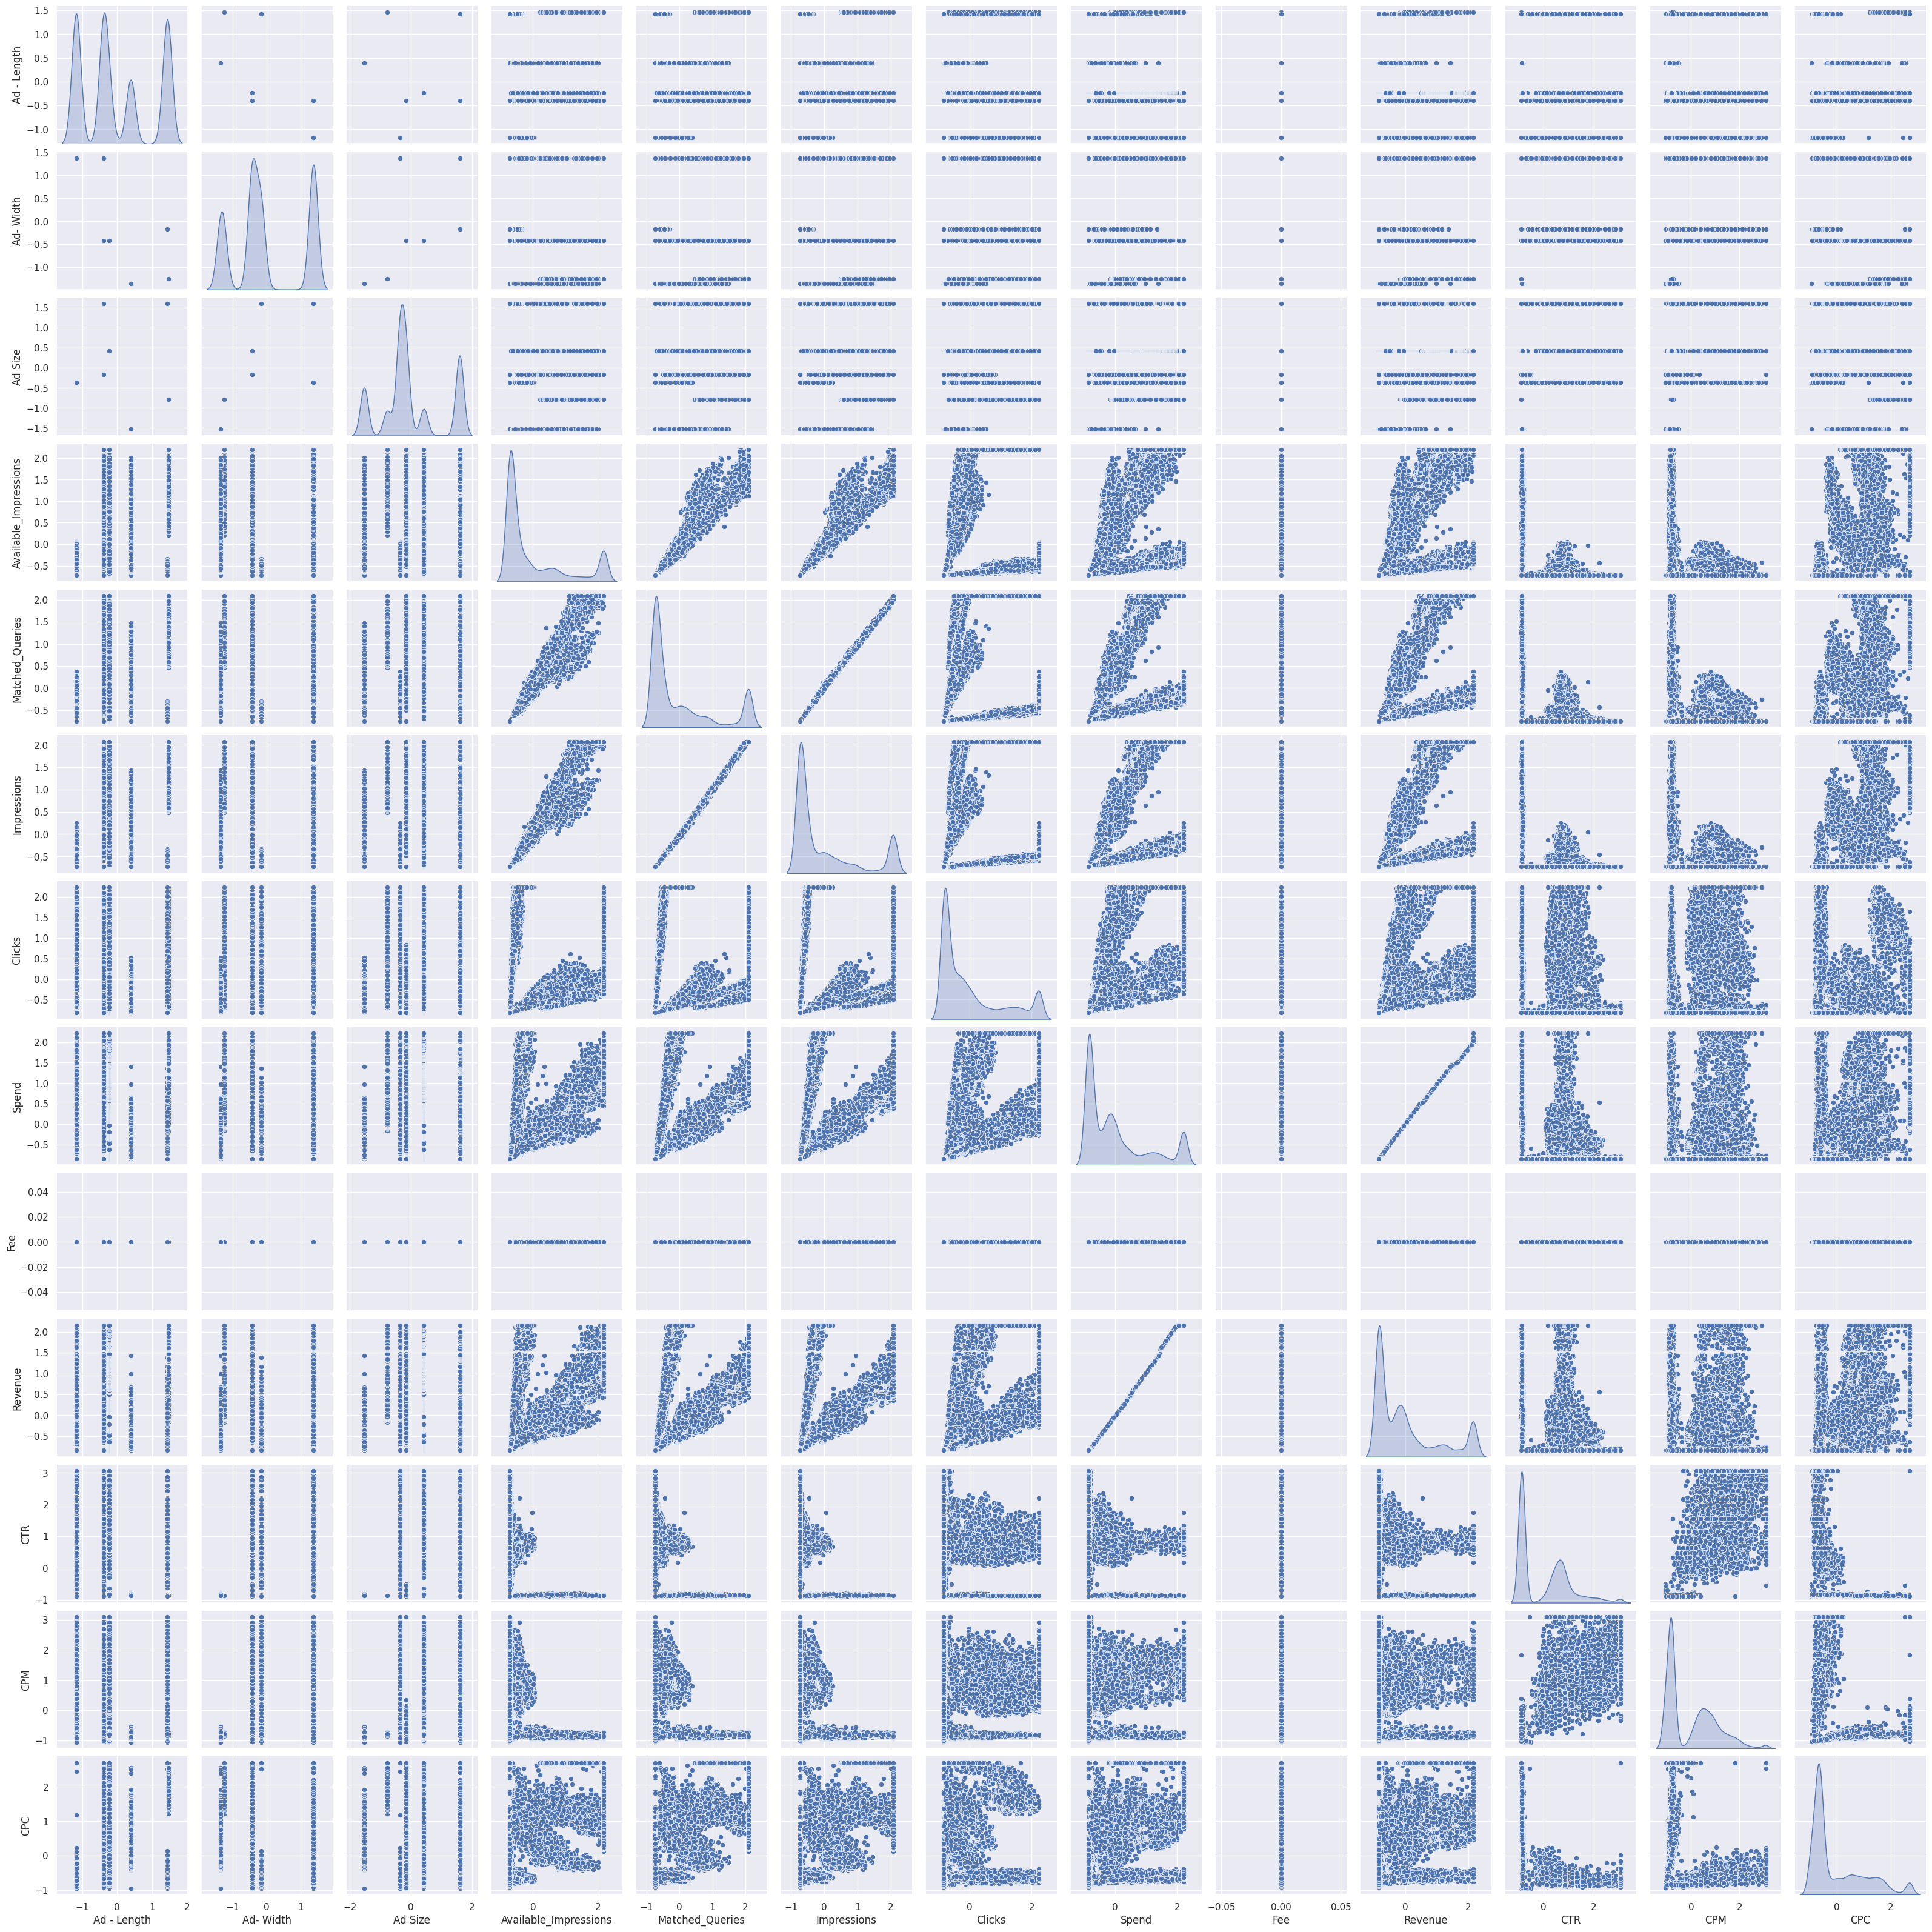

In [29]:
sns.pairplot(df_num_scaled, diag_kind='kde');

- The diagonal of the pairplot gives us a brief idea of how many
  clusters could be ideal
- If we observe from the diagnol element of Spend
    - We can see 4-5 peaks roughly in the data
    - if there were a categorical variable we might get the different KDE plots superimposed on one another
- Similarly, Ad-Size is giving an idea of roughly 5 clusters.

### Hierarchical Clustering

Question 5: Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples

In [32]:
# creating distance matirx using ward method on euclidean distance
wardlink = linkage(df_num_scaled, method='ward')

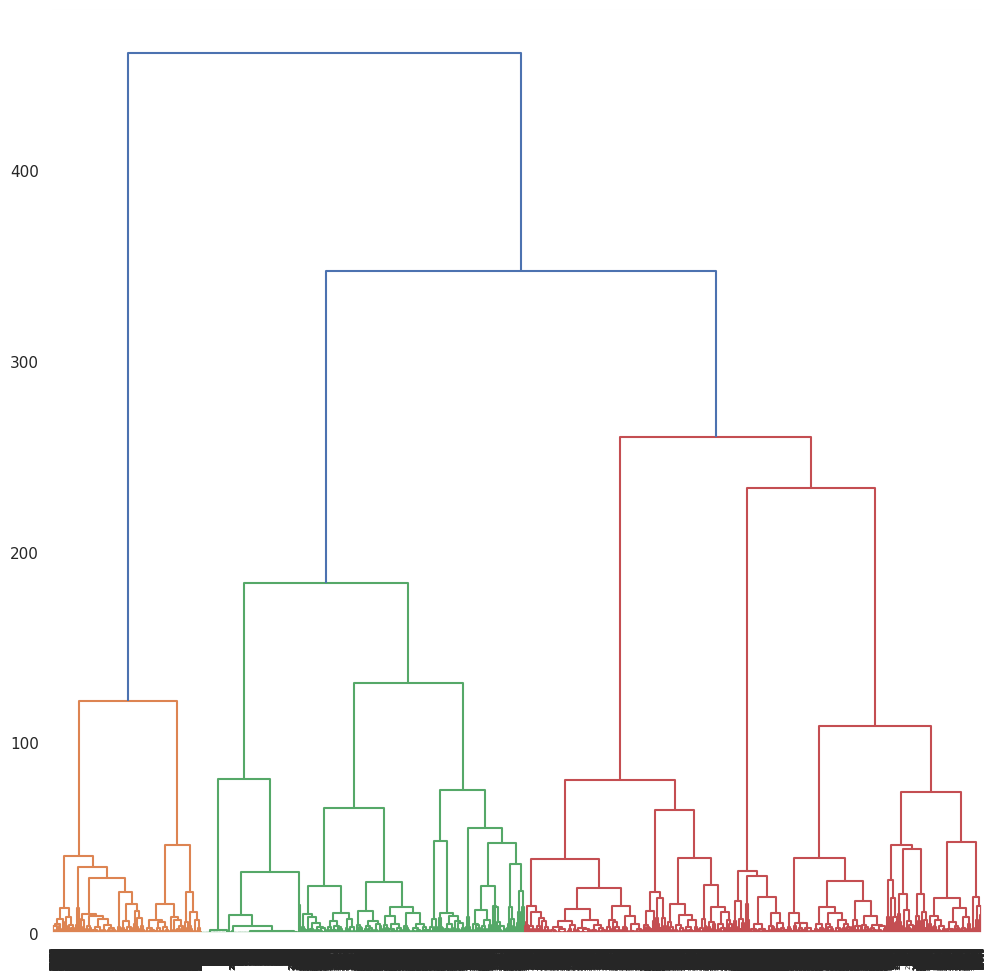

In [33]:
plt.figure(figsize=(12,12))
dendrogram(wardlink);

Question 7: Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [ ]:
# Lets find the silhouette scores for distances starting from 50 to 400 with step 25
sil_scores = []
for i in range(50,400,25):
    labels = fcluster(wardlink, criterion='distance', t=i)
    sil_scores.append(silhouette_score(df_num_scaled, labels, random_state=42))

In [ ]:
sns.lineplot(x=np.arange(50,400,25), y=sil_scores, marker='o')
plt.axvline(125, c='green');

We shall consider the distance 125 and not 50 here, because 50 is a smaller value and it can give a bigger number of clusters. Further, as we decrease the value of distances, we can get more clusters, which can be hard to analyse.

In [ ]:
plt.figure(figsize=(12,12))
dendrogram(wardlink, truncate_mode='lastp', p=50)
plt.axhline(125, c='cyan');

The 125 distance line is cutting through 7 vertical lines means 7 clusters are given by Hierarchical Clustering technique which have a decent silhouette score of 0.49.

### K-Means Clustering

Question 6: Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [41]:
from sklearn.cluster import KMeans

In [42]:
# starting with k=1
# we will find out the Within Sum of Squares for each k clusters
# and the silhouette scores of them starting from 2
wss = []
sil_score = []
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init='auto', random_state=42)
    y = km.fit_predict(df_num_scaled)
    wss.append(km.inertia_)
    if i>1:
        sil_score.append(silhouette_score(df_num_scaled, y, random_state=42))

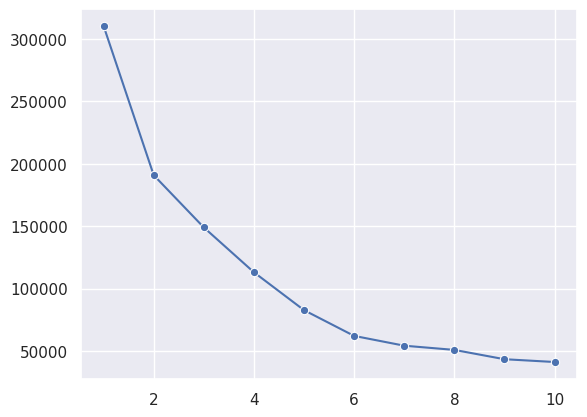

In [43]:
sns.lineplot(x=np.arange(1,11), y=wss, marker='o');

From the above graph, we notice that the number of clusters is coming out to be either 4 or 5. Let us confirm this using another python function KneeLocator from kneed module.

In [48]:
!pip install --upgrade kneed

In [49]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wss, curve = 'convex', direction = 'decreasing')
k = kl.elbow
k

5

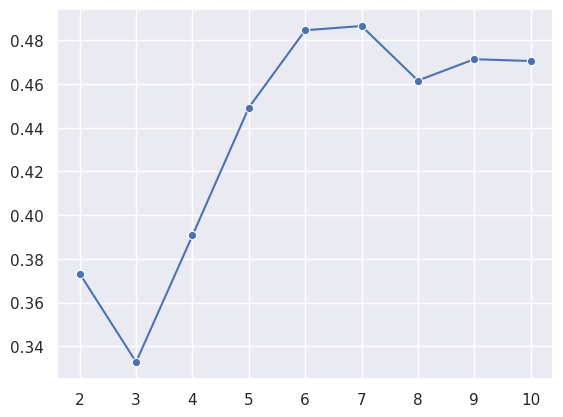

In [50]:
sns.lineplot(x=np.arange(2,11), y=sil_score, marker='o');

According to the KneeLocator, the number of clusters is 5. But, we have the silhouette score of 5 clusters better than 4 clusters.
We do not look at the silhouette scores of 8, 9 or 10 clusters, because when we keep increasing them, the scores shall only improve but more clusters would make it harder to analyse data.

Let us find out the silhouette samples of both 4 and 5 clusters and look at their minimum values.

#### K = 4 Clusters

In [61]:
km = KMeans(n_clusters=4, n_init='auto', random_state=42)
Y = km.fit_predict(df_num_scaled)
silhouette_score(df_num_scaled, Y, random_state=42)

0.3906928298425056

In [62]:
sil_width = silhouette_samples(df_num_scaled, Y)

In [63]:
# putting the info in original dataset
df['k_4'] = Y
df['k_4_sil_width'] = sil_width

#### K = 5 Clusters

In [64]:
km = KMeans(n_clusters=5, n_init='auto', random_state=42)
Y = km.fit_predict(df_num_scaled)
silhouette_score(df_num_scaled, Y, random_state=42)

0.4492493143361586

In [65]:
sil_width = silhouette_samples(df_num_scaled, Y)

In [66]:
# putting the info in original dataset
df['k_5'] = Y
df['k_5_sil_width'] = sil_width

In [67]:
df[['k_4_sil_width','k_5_sil_width']].min()

k_4_sil_width   -0.144023
k_5_sil_width   -0.105784
dtype: float64

The minimum silhouette width for k=5 cluster is smaller than k=4. Although both are negative which means there are some values for which the mapping is not ideal with their clusters. But, k=5 is slightly better than k=4.

In [68]:
# dataset correction
df['Group'] = df.k_5
df['Group_sil_width'] = df.k_5_sil_width

df.drop(['k_5','k_5_sil_width','k_4','k_4_sil_width'], axis=1, inplace=True)

In [70]:
df.sample(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Group,Group_sil_width
8567,2020-10-23-5,Format1,300,250,75000.0,Inter222,Video,Desktop,Video,630266.0,345171.0,337219.0,785.0,640.840,0.35,416.5500,0.232786,1.900367,0.816357,0,0.370638
19285,2020-9-8-17,Format4,120,600,72000.0,Inter218,App,Mobile,Display,1041074.0,716136.0,613012.0,26245.0,6676.655,0.35,4339.8250,14.021585,12.941443,0.092297,4,0.783745
16216,2020-11-24-17,Format5,720,300,102000.0,Inter220,Web,Mobile,Display,512453.0,314406.0,270395.0,26245.0,3296.950,0.35,2208.9500,14.324969,12.193088,0.085118,3,0.345983
21042,2020-10-31-17,Format5,720,300,102000.0,Inter217,Web,Desktop,Display,20.0,8.0,8.0,2.0,0.110,0.35,0.0715,25.000000,13.750000,0.055000,3,0.294152
4675,2020-11-8-13,Format4,120,600,72000.0,Inter222,Video,Desktop,Display,4711.0,2632.0,2524.0,651.0,37.880,0.35,24.6200,25.792393,15.007924,0.058187,1,0.473009
2578,2020-9-14-7,Format5,720,300,102000.0,Inter223,Web,Mobile,Video,1.0,0.0,0.0,0.0,0.000,0.35,0.0000,0.000000,0.000000,0.000000,3,0.311010
5594,2020-9-30-15,Format4,120,600,72000.0,Inter218,App,Mobile,Video,46702.0,22818.0,6208.0,683.0,61.320,0.35,39.8600,11.001933,9.877577,0.089780,1,0.577387
11916,2020-9-22-3,Format4,120,600,72000.0,Inter228,Video,Mobile,Display,125203.0,98988.0,83296.0,11403.0,1544.280,0.35,1003.7800,13.689733,18.539666,0.135428,1,0.247293
20134,2020-9-27-16,Format2,728,90,65520.0,Inter224,Web,Desktop,Video,5507510.5,2512251.0,2370395.5,17472.0,6676.655,0.35,4339.8250,0.222960,1.864314,0.836164,2,0.586179
22530,2020-11-19-12,Format4,120,600,72000.0,Inter223,Web,Mobile,Display,631813.0,475427.0,385559.0,26245.0,6676.655,0.35,4339.8250,13.499879,19.136864,0.141756,4,0.765382


### Profiling Ads

Question 8: Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [76]:
analyze_cols = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CPC', 'CTR']

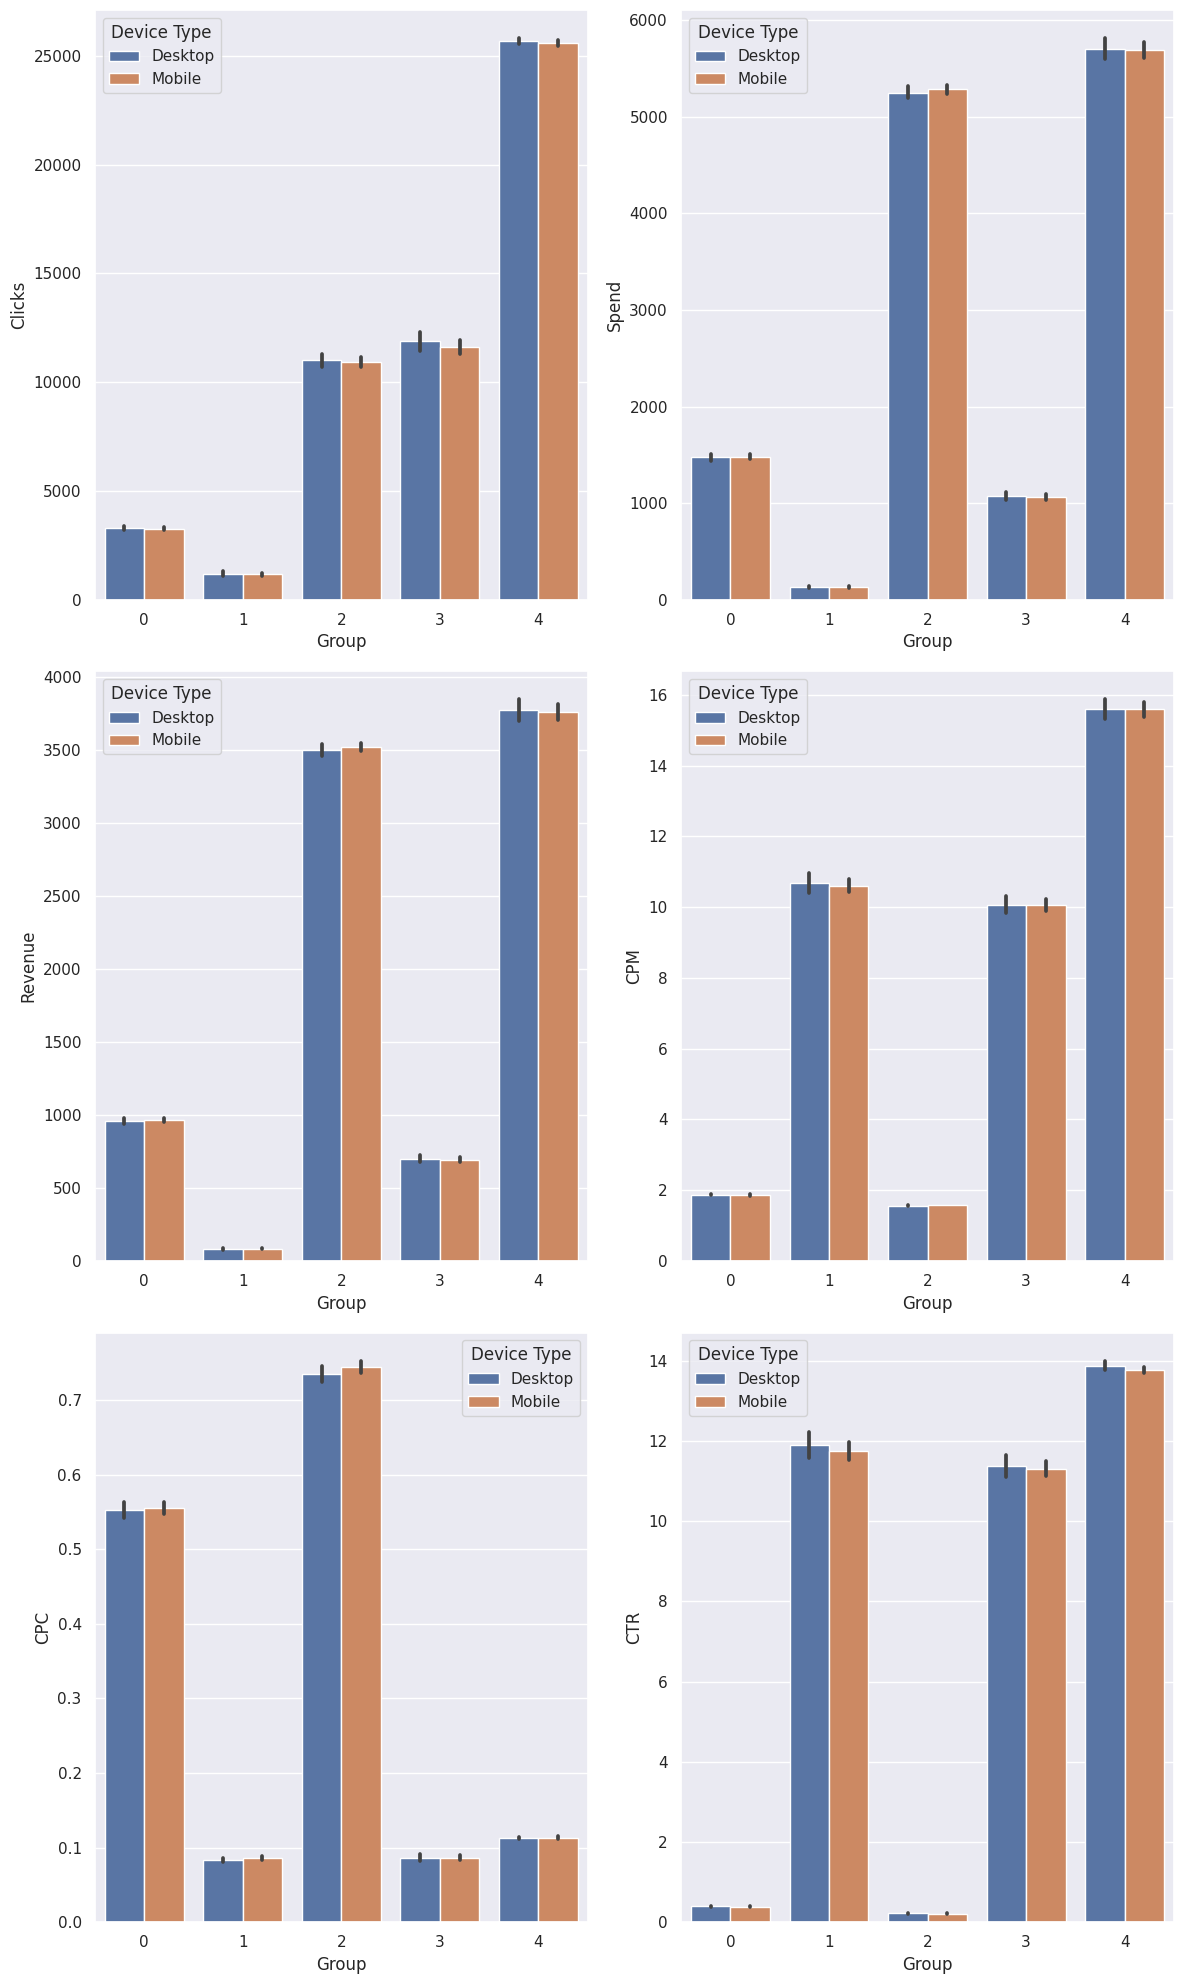

In [73]:
plt.figure(figsize=(12,20))
c = 1
for i in analyze_cols:
    plt.subplot(3,2,c)
    sns.barplot(data=df, x='Group', y=i, hue='Device Type')
    c += 1
plt.tight_layout();

In [75]:
df.groupby('Group')[analyze_cols].mean()

,Clicks,Spend,Revenue,CPM,CPC,CTR
Group,,,,,,
0,3273.092627,1479.593336,963.159627,1.869417,0.553964,0.394061
1,1177.429286,129.462094,84.150321,10.641669,0.084811,11.795258
2,10964.903073,5272.331253,3510.001159,1.576616,0.741368,0.218288
3,11708.244205,1068.596831,695.815840,10.067427,0.086468,11.334377
4,25619.181393,5700.340418,3762.780737,15.601043,0.113328,13.807054


Question 9: Part 1 - Clustering: Conclude the project by providing summary of your learnings.

The conclusions have been explained in the business report. Please refer the same.
